In [21]:
# Import necessary libraries and modules

# Custom modules for specific functionalities
from pyDTDM import *  # Custom data management module


# Standard libraries
import warnings  # Module for managing warnings
import yaml  # Library for parsing YAML files
try:
    from yaml import Cloader as Loader  # Faster YAML loader if available
except ImportError:
    from yaml import Loader  # Fallback to default YAML loader
import cmcrameri.cm as cmc



In [3]:
# Define the path to the configuration file
config_file = "InputFiles/phase2NNR_paleotopography.yaml"

# Open the configuration file and load parameters using YAML
with open(config_file) as f:
    PARAMS = yaml.load(f, Loader=Loader)  # Load parameters from YAML file using the specified Loader

# Print a confirmation message indicating the configuration file and parameters
print("––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––– ")
print(" Parameters set from %s" % config_file)  # Display the path of the configuration file
print("––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––– ")

––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––– 
 Parameters set from InputFiles/phase2NNR_paleotopography.yaml
––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––– 


In [4]:
### Tester to see if Deep Learning is Working
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
# Define the neural network model
class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.bn1(x)
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.bn2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

# Generate random data
def generate_data(num_samples, input_shape):
    X = np.random.randn(num_samples, input_shape).astype(np.float32)
    y = np.random.randint(0, 2, num_samples).astype(np.float32)
    return torch.tensor(X), torch.tensor(y).view(-1, 1)

# Training function
def train_model(model, criterion, optimizer, X_train, y_train, epochs=10, batch_size=32):
    model.train()
    dataset = torch.utils.data.TensorDataset(X_train, y_train)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)
    
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in dataloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(dataloader)}")

# Example usage
input_shape = 10  # Example input shape
num_samples = 1000  # Number of samples

# Generate data
X_train, y_train = generate_data(num_samples, input_shape)

# Create the model
model = SimpleNN(input_shape)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
train_model(model, criterion, optimizer, X_train, y_train, epochs=10, batch_size=32)

# Print the model summary
print(model)


Epoch 1, Loss: 0.7533310335129499
Epoch 2, Loss: 0.7448980994522572
Epoch 3, Loss: 0.7172516789287329
Epoch 4, Loss: 0.7073160391300917
Epoch 5, Loss: 0.7104544006288052
Epoch 6, Loss: 0.7159639727324247
Epoch 7, Loss: 0.7029437255114317
Epoch 8, Loss: 0.6863924879580736
Epoch 9, Loss: 0.6949639711529016
Epoch 10, Loss: 0.6878612749278545
SimpleNN(
  (fc1): Linear(in_features=10, out_features=128, bias=True)
  (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc3): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


## Input Files

This section of the code retrieves and sets paths for various input files required for the analysis. It uses parameters loaded from the configuration file to determine the locations and names of these files.



In [5]:
# Retrieve model name and directory from configuration parameters
MODEL_NAME = PARAMS['InputFiles']['plate_kinematics']['model_name']  # Name of the plate kinematics model
MODEL_DIR = PARAMS['InputFiles']['plate_kinematics']['model_dir']  # Directory containing the plate model

# Define file paths for topology and rotation data
topology_filenames = [f"{MODEL_DIR}/{i}" for i in PARAMS['InputFiles']['plate_kinematics']['topology_files']]
rotation_filenames = [f"{MODEL_DIR}/{i}" for i in PARAMS['InputFiles']['plate_kinematics']['rotation_files']]

# Define file path for the age grid
agegrid = PARAMS['InputFiles']['plate_kinematics']['agegrid']

# Define file path and type for the ETOPO grid
ETOPO_FILE = PARAMS['InputFiles']['Raster']['ETOPO_FILE']  # ETOPO grid file (NetCDF or GeoTIFF)
ETOPO_Type = PARAMS['InputFiles']['Raster']['Raster_type']  # Type of ETOPO raster file

# Define file paths for coastlines, static polygons, and continents
coastlines = f"{MODEL_DIR}/{PARAMS['InputFiles']['plate_kinematics']['coastline_file']}"
static_polygon_file = f"{MODEL_DIR}/{PARAMS['InputFiles']['plate_kinematics']['static_polygon']}"
static_polygons = pygplates.FeatureCollection(static_polygon_file)  # Load static polygons as a feature collection
continents = f"{MODEL_DIR}/{PARAMS['InputFiles']['plate_kinematics']['continents']}"

# Print details of the input files and model settings
print("––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––– ")
print("Reading input file..... \n")
print("––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––– ")
print(f"Plate Model: {MODEL_NAME} \n")  # Print plate model name
print(f"Model Directory: {MODEL_DIR} \n")  # Print model directory
print(f"Coastlines: {coastlines} \n")  # Print path to coastlines file
print(f"Continents: {continents} \n")  # Print path to continents file
print(f"Static Polygons: {static_polygon_file} \n")  # Print path to static polygons file
print(f"Model Agegrid: {agegrid} \n")  # Print path to age grid file
print(f"ETopo grid: {ETOPO_FILE}")  # Print path to ETOPO grid file
print("––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––– \n")


––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––– 
Reading input file..... 

––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––– 
Plate Model: phase2NNR 

Model Directory: /Users/ssin4735/Documents/PROJECT/PhD Project/Codes and Data/BhuDM/Zahirovic_etal_2022_GDJ_NNR 

Coastlines: /Users/ssin4735/Documents/PROJECT/PhD Project/Codes and Data/BhuDM/Zahirovic_etal_2022_GDJ_NNR/StaticGeometries/Coastlines/Global_coastlines_low_res.shp 

Continents: /Users/ssin4735/Documents/PROJECT/PhD Project/Codes and Data/BhuDM/Zahirovic_etal_2022_GDJ_NNR/StaticGeometries/ContinentalPolygons/Global_EarthByte_GPlates_PresentDay_ContinentalPolygons.shp 

Static Polygons: /Users/ssin4735/Documents/PROJECT/PhD Project/Codes and Data/BhuDM/Zahirovic_etal_2022_GDJ_NNR/StaticGeometries/StaticPolygons/Global_EarthByte_GPlates_PresentDay_StaticPlatePolygons.shp 

Model Agegrid: /Users/ssin4735/Documents/PROJECT/PhD Project/Codes and Data/BhuDM/SeafloorAgegrid 

ETopo grid

## Configuration Parameters

This section sets and prints various configuration parameters required for the model. These include settings for paleomagnetic and mantle reference frames, mesh refinement, grid resolution, time parameters, and parallel processing options.


In [10]:
# Retrieve and set various configuration parameters from the YAML file

# Paleomagnetic and mantle-optimized reference frame IDs
Paleomag_ID = PARAMS['Parameters']['paleomag_id']  # ID for the paleomagnetic reference frame
Mantle_ID = PARAMS['Parameters']['mantle_optimised_id']  # ID for the mantle-optimized reference frame

# Parameters for mesh refinement, moving window, and weighted mean
MESH_REFINEMENT_LEVEL = PARAMS['Parameters']['mesh_refinement_level']  # Level of mesh refinement (higher level = finer mesh, longer run time)
WINDOW_SIZE = int(PARAMS['Parameters']['time_window_size'])  # Size of the moving window for analysis
Weighted = PARAMS['Parameters']['weighted_mean']  # Whether to use weighted mean in calculations

# Grid resolution and compression settings for NetCDF files
NETCDF_GRID_RESOLUTION = PARAMS['GridParameters']['grid_spacing']  # Resolution of NetCDF grid in degrees
ZLIB = PARAMS['GridParameters']['compression']['zlib']  # Compression method for NetCDF files
COMPLEVEL = PARAMS['GridParameters']['compression']['complevel']  # Compression level for NetCDF files

# Time parameters for the model
FROM_TIME = int(PARAMS['TimeParameters']['time_max'])  # Start time for the model
TO_TIME = int(PARAMS['TimeParameters']['time_min'])  # End time for the model
TIME_STEPS = int(PARAMS['TimeParameters']['time_step'])  # Time step intervals for the model

# Parallel processing settings
parallel = PARAMS['Parameters']['number_of_cpus']  # Number of CPU cores to use (or None for single-core)

# Print the parameters to confirm the settings
print("––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––– ")
print("The following parameters are set-")
print("––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––– ")
print(f"Mantle Optmised Reference Frame ID: {Mantle_ID}")  # Print mantle-optimized reference frame ID
print(f"Paleomagnetic Reference Frame ID: {Paleomag_ID} \n")  # Print paleomagnetic reference frame ID

print(f"Moving Window Size: {WINDOW_SIZE}")  # Print moving window size
print(f"Weighted Mean: {Weighted}")  # Print whether weighted mean is used

print(f"Mesh Refinement Level: {MESH_REFINEMENT_LEVEL}")  # Print mesh refinement level
print(f"NetCDF GRID Resolution: {NETCDF_GRID_RESOLUTION}")  # Print NetCDF grid resolution
print(f"NetCDF Compression Level: {COMPLEVEL} \n")  # Print NetCDF compression level

print(f"Model Start Time: {FROM_TIME}")  # Print model start time
print(f"Model End Time: {TO_TIME}")  # Print model end time
print(f"Model Time Step: {TIME_STEPS}\n")  # Print model time step

print(f"Number of CPU: {parallel}")  # Print number of CPU cores to use

print("––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––– ")


––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––– 
The following parameters are set-
––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––– 
Mantle Optmised Reference Frame ID: 666666
Paleomagnetic Reference Frame ID: 0 

Moving Window Size: 25
Weighted Mean: True
Mesh Refinement Level: 9
NetCDF GRID Resolution: 0.1
NetCDF Compression Level: 5 

Model Start Time: 10
Model End Time: 0
Model Time Step: 1

Number of CPU: -1
––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––– 


## Output Directory Setup

This section configures the directories for saving output files. It ensures that the necessary output folders exist and creates them if they do not. The directories are specified based on parameters from the configuration file.


In [7]:
# Define output directories based on configuration parameters
OUTPUT_FOLDER = PARAMS['OutputFiles']['output_dir']  # Root directory for output files

# Define subdirectories for different types of output files
DEFAULT_OUTPUT_CSV = os.path.join(OUTPUT_FOLDER, 'CSV')  # Subdirectory for CSV files
DEFAULT_OUTPUT_NetCDF = os.path.join(OUTPUT_FOLDER, 'NetCDF')  # Subdirectory for NetCDF files

# Print confirmation message about output directory
print("––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––– ")
print(f"All the output will be saved in {OUTPUT_FOLDER}")  # Display the root output directory
print("––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––– ")

# Create directories if they do not exist
create_directory_if_not_exists(OUTPUT_FOLDER)  # Ensure the root output directory exists
create_directory_if_not_exists(DEFAULT_OUTPUT_CSV)  # Ensure the CSV subdirectory exists
create_directory_if_not_exists(DEFAULT_OUTPUT_NetCDF)  # Ensure the NetCDF subdirectory exists

# Print confirmation message after creating directories
print("––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––– ")


––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––– 
All the output will be saved in /Volumes/Satyam/BHPDryRun
––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––– 
––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––– 


## Define Plate Reconstruction

### Initialize Plate Kinematics 

This section initializes the plate kinematics parameters and creates a plot for topologies based on the current configuration. It sets up the necessary data and visualization for analyzing plate movements.


In [8]:
# Initialize Plate Kinematics Parameters with necessary files and parameters
PK = PlateKinematicsParameters(
    topology_filenames,  # List of topology filenames
    rotation_filenames,  # List of rotation filenames
    static_polygons,     # Static polygons for features
    agegrid=agegrid,     # Age grid for the model
    coastlines=coastlines,  # Coastline data
    continents=continents,  # Continents data
    anchor_plate_id=Mantle_ID  # ID for the mantle-optimized reference frame
)

# Set the time for plotting (in million years)
time = 0  # Time in Ma (million years)

# Create a plot for topologies using the PlateKinematicsParameters instance
gplot = gplately.PlotTopologies(
    PK.model,  # Plate kinematics model
    coastlines=coastlines,  # Coastline data
    continents=continents,  # Continents data
    time=time  # Time for plotting
)


RotationModel: No filename associated with <class 'pygplates.pygplates.RotationModel'> in __init__
 ensure pygplates is imported from gplately. Run,
 from gplately import pygplates


### Retrieve and List Available Timesteps

This section retrieves and lists the available timesteps from the processed data files. It searches for files in a specified directory, extracts the timesteps from their filenames, and sorts them.


In [11]:
all_times=glob.glob(f"{DEFAULT_OUTPUT_CSV}/Processed_{WINDOW_SIZE}_Ma/*")
all_times=np.sort([int(time.split('_')[-1].split('.')[0]) for time in all_times])
print(f"Available Timesteps: {all_times}")

Available Timesteps: [0 1 2 3 4 5 6 7 8 9]


## Training Model

### Load and Process Training Data

This section loads and processes the training data for the model. It reads data from a parquet file, removes missing values, drops unnecessary columns, and incorporates additional parameters from a raster file.


In [13]:
# Define the time point for reconstruction
reconstruction_time = 0

# Load the training data from a parquet file corresponding to the reconstruction time
TrainingData = pd.read_parquet(f"{DEFAULT_OUTPUT_CSV}/Processed_{WINDOW_SIZE}_Ma/Processed_Data_{reconstruction_time}.parquet")

# Drop rows with missing values
TrainingData = TrainingData.dropna()


# Initialize BhuRaster with the ETOPO file and type
ETopo = BhuRaster(folder_location=ETOPO_FILE, Raster_Type=ETOPO_Type)

# Get additional parameters from the ETOPO raster and merge them into the training data
TrainingData = ETopo.get_parameters(TrainingData)



#### Filter Points Within Continents

This section filters the training data to include only those points that fall within specified continental polygons and meet a distance criterion. It involves loading continental polygons, converting training data to a GeoDataFrame, performing a spatial join, and applying additional filters.


In [14]:
# Load continental polygons from the specified file
continental_poly = gpd.read_file(continents)

# Create a copy of the training data
points = TrainingData.copy()

# Convert training data to a GeoDataFrame with longitude and latitude as geometries
points_gdf = gpd.GeoDataFrame(
    points,
    geometry=gpd.points_from_xy(points['Longitude'], points['Latitude'])
)

# Set the coordinate reference system (CRS) to WGS84 (EPSG:4326)
points_gdf = points_gdf.set_crs(epsg=4326)

# Perform a spatial join to find points within the continental polygons
point_within_continents = gpd.sjoin(points_gdf, continental_poly, how='inner', predicate='within')

# Remove duplicate entries from the joined GeoDataFrame
point_within_continents = point_within_continents.drop_duplicates()

# Filter the points to include only those with 'Trench Distance' less than 1,400,000 meters
point_within_continentsc = point_within_continents[point_within_continents['Trench Distance'] < 1400000].copy()


#### Filter Points Within Mountain Areas

This section filters the training data to include only those points that fall within specified mountain areas. It involves loading mountain shapefiles, combining them, and performing a spatial join to identify points within these mountain areas.


In [18]:
# Load mountain shapefiles from specified paths
mountains = gpd.read_file("MountainShapeFiles/Filtered_Mountains/Filtered_GMBA.shp")

# Set the coordinate reference system (CRS) to WGS84 (EPSG:4326)
mountains = mountains.set_crs(epsg=4326)

# Create a copy of the training data
points = TrainingData.copy()

# Convert training data to a GeoDataFrame with longitude and latitude as geometries
points_gdf = gpd.GeoDataFrame(
    points,
    geometry=gpd.points_from_xy(points['Longitude'], points['Latitude'])
)

# Set the CRS for the points GeoDataFrame to match the mountains GeoDataFrame
points_gdf = points_gdf.set_crs(epsg=4326)

# Perform a spatial join to find points within the mountain areas
point_within_mountains = gpd.sjoin(points_gdf, mountains, how='inner', predicate='within')


<GeoAxes: >

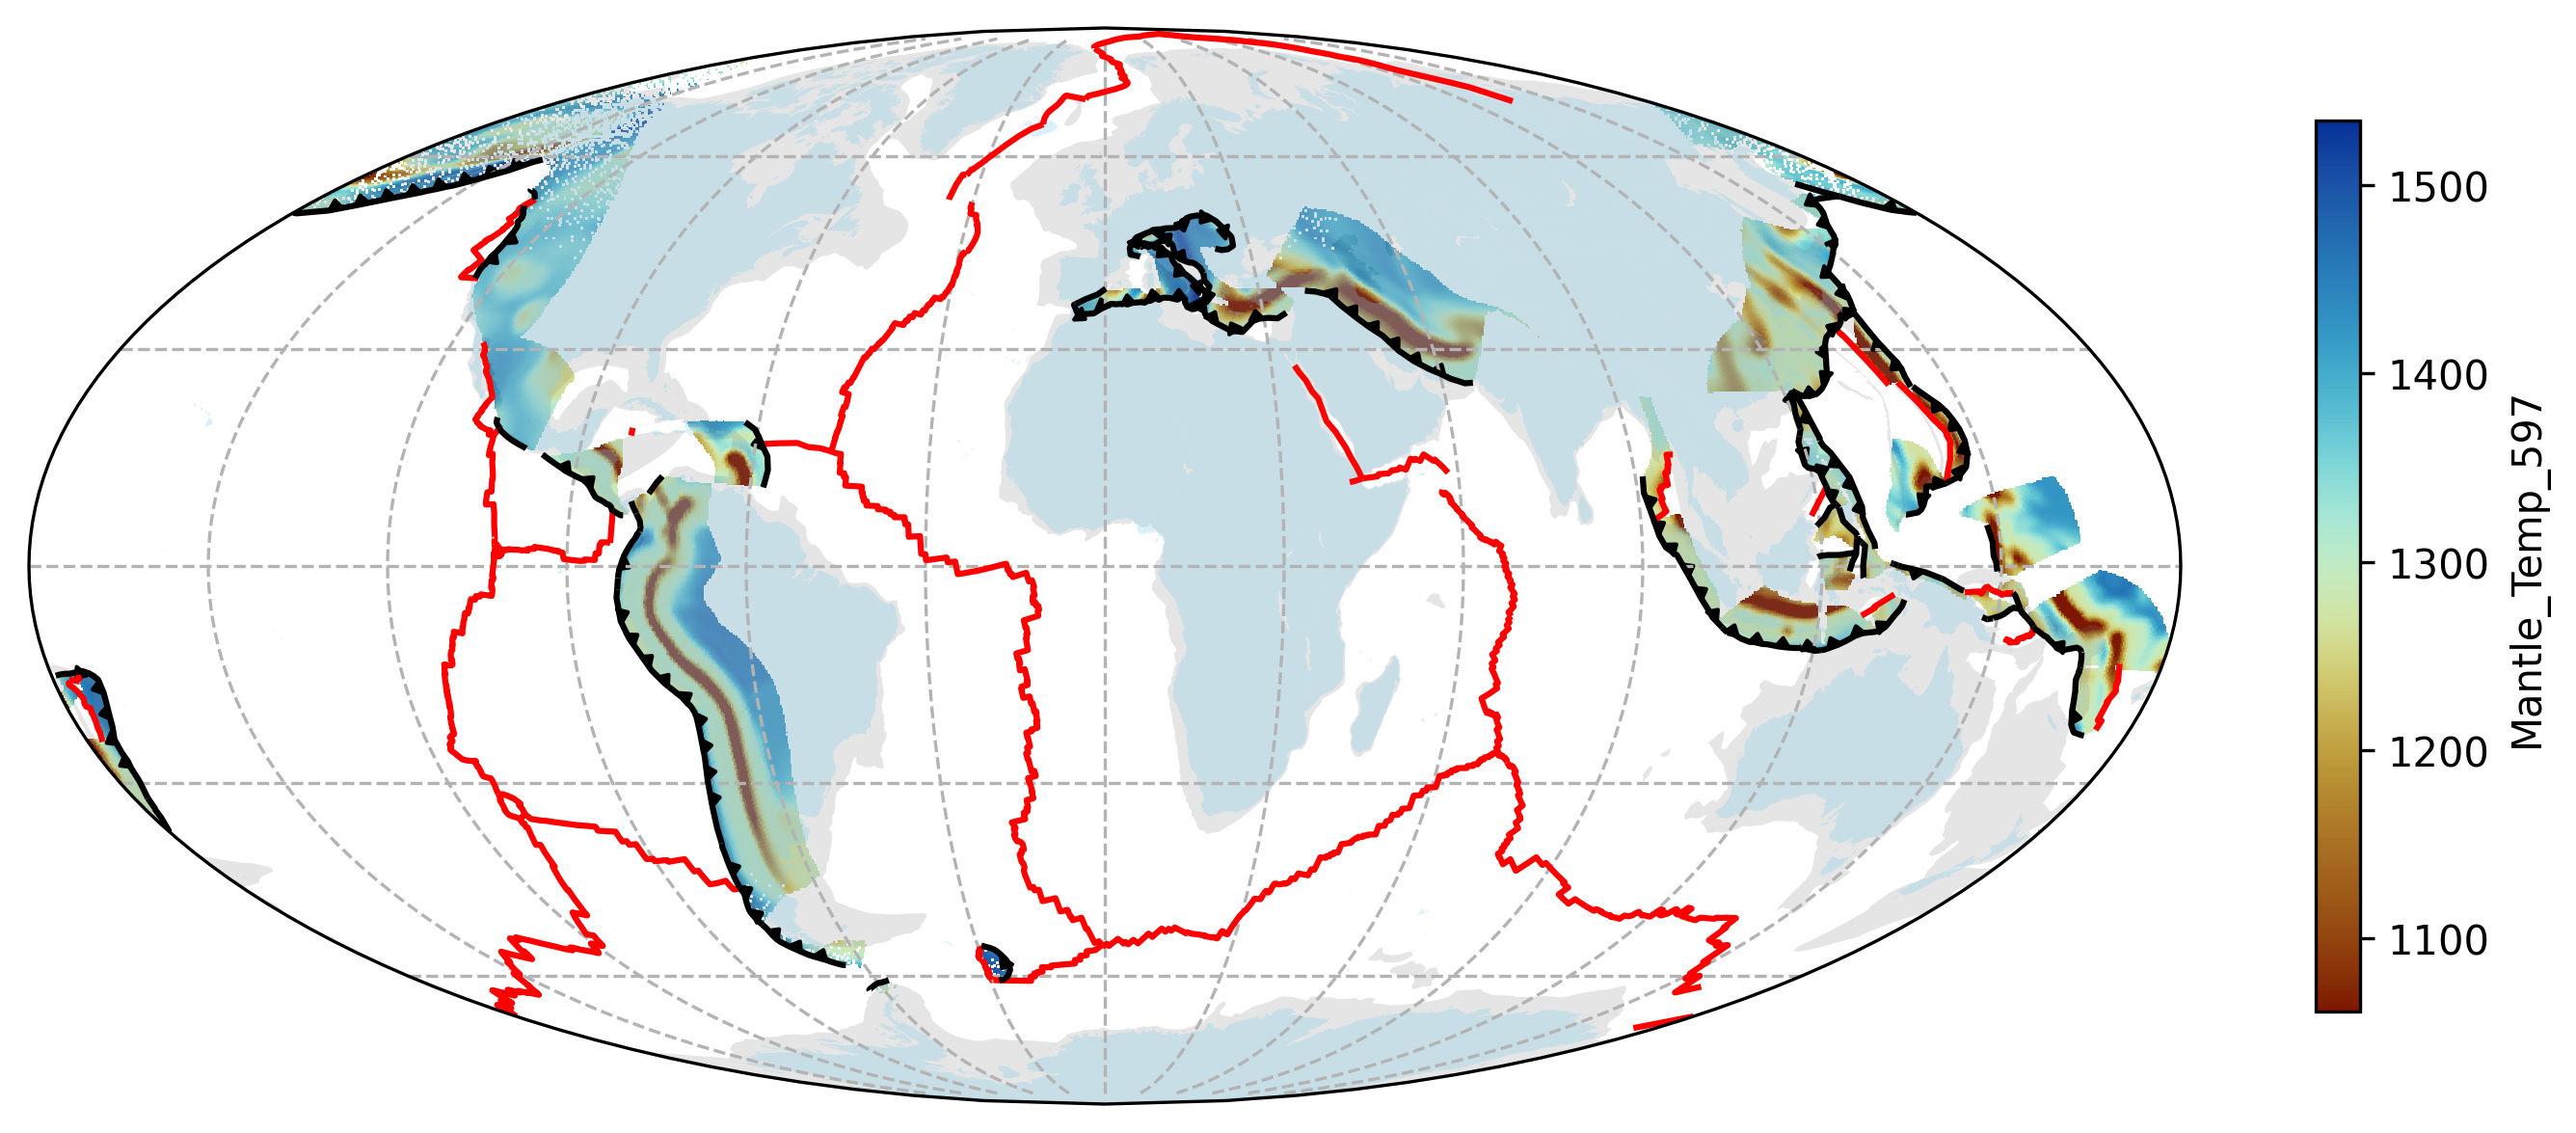

In [23]:
Data_gdf=gpd.GeoDataFrame(TrainingData,geometry=gpd.points_from_xy(TrainingData['Longitude'],TrainingData['Latitude']))
Data_gdf=Data_gdf.set_crs("epsg:4326")
k=48
columns=Data_gdf.columns
column=columns[k]

data = Data_gdf[column]
# Calculate mean and standard deviation
mean = data.mean()
std = data.std()

# Calculate vmin and vmax
vmin = mean - 2 * std
vmax = mean + 2 * std
kwargs={'vmin':vmin,'vmax':vmax,'cmap':cmc.roma,'label':column}



plotgdf(Data_gdf,gplot=gplot,time=reconstruction_time,column=column,cbar=True,mollweide=True,quick=True,**kwargs)

In [24]:
# del TrainingData
print(f"Number of Data Points:{len(Data_gdf)}")

Number of Data Points:271565


### Define Columns for Training

This section specifies the columns to be used for training the machine learning model. These columns include various geological and mantle parameters that will be utilized to predict elevation.


In [25]:
columns_to_train=['Humid_Belt', 
                  'Convergence Rate', 
                  'Migration Rate',
       'Subduction Velocity', 
                  # 'Obliquity Angle', 'Subduction Normal Angle',
       'Subduction Length', 
                  'Subduction Plate Velocity',
       'Subduction Plate Obliquity', 
                  # 'Nearest Trench Edge',
       #   'Convergence Velocity Orthogonal',
       # 'Convergence Velocity Parallel', 'Trench Velocity Orthogonal',
       # 'Trench Velocity Parallel', 'Subducting Velocity Orthogonal',
       # 'Subducting Velocity Parallel',
                  'Subduction Volume Rate',
       'Plate Thickness',
                  'Subduction Flux', 
                  'Trench Distance',
        # 'Mantle_Temp_16', 'Mantle_Temp_31',
       # 'Mantle_Temp_47', 'Mantle_Temp_62', 'Mantle_Temp_140',
       # 'Mantle_Temp_155', 'Mantle_Temp_171', 'Mantle_Temp_186',
       'Mantle_Temp_202', 'Mantle_Temp_217', 'Mantle_Temp_233',
       'Mantle_Temp_268', 'Mantle_Temp_293', 'Mantle_Temp_323',
       'Mantle_Temp_357', 'Mantle_Temp_396', 'Mantle_Temp_439',
       'Mantle_Temp_487', 'Mantle_Temp_540', 'Mantle_Temp_597',
       'Mantle_Temp_660',
                  # 'Mantle_Velocity_16', 'Mantle_Velocity_31',
       # 'Mantle_Velocity_47', 'Mantle_Velocity_62', 'Mantle_Velocity_140',
       # 'Mantle_Velocity_155', 'Mantle_Velocity_171', 'Mantle_Velocity_186',
       'Mantle_Velocity_202', 
                  'Mantle_Velocity_217', 'Mantle_Velocity_233',
       'Mantle_Velocity_268', 'Mantle_Velocity_293', 'Mantle_Velocity_323',
       'Mantle_Velocity_357', 'Mantle_Velocity_396', 'Mantle_Velocity_439',
       'Mantle_Velocity_487', 'Mantle_Velocity_540', 'Mantle_Velocity_597',
       'Mantle_Velocity_660']

### Random Forest Model
#### Build and Train Random Forest Model

This section sets up and trains a Random Forest model using the selected training data and parameters. The model is used to predict elevation based on various geological and mantle parameters. After training, the model's prediction error is calculated.


In [26]:
# Initialize and configure the Random Forest model for predicting elevation
RFTopoModel_continents = RFModel(
    training_df=point_within_continentsc,  # DataFrame with points within continents
    training_variables=columns_to_train,  # List of features to be used for training
    target_variable='Elevation',  # Target variable for prediction
    n_estimators=200,  # Number of trees in the forest
    max_depth=8,  # Maximum depth of each tree
    min_samples_split=10,  # Minimum number of samples required to split an internal node
    min_samples_leaf=5,  # Minimum number of samples required to be at a leaf node
    max_features='sqrt',  # Number of features to consider when looking for the best split
    parallel=10,  # Number of CPU cores to use for parallel processing
    random_state=22  # Seed used by the random number generator
)



# RFTopoModel_continents=RFModel(training_df=TrainingData, ## All Training Data
#             training_variables=columns_to_train, 
#             target_variable='Elevation',
#             n_estimators=200,
#             max_depth=9,
#             min_samples_split=10,
#             min_samples_leaf=5,
#             max_features='sqrt',
#             parallel=10,
#             random_state=22)


# RFTopoModel_continents=RFModel(training_df=point_within_mountains, ## only mountains
#             training_variables=columns_to_train, 
#             target_variable='Elevation',
#             n_estimators=200,
#             max_depth=9,
#             min_samples_split=10,
#             min_samples_leaf=5,
#             max_features='sqrt',
#             parallel=10,
#             random_state=22)
# Train the Random Forest model
RFTopoModel_continents.fit()

# Print the mean absolute error between predicted and actual elevations
print(f"Error={abs(RFTopoModel_continents.df['Predicted Elevation'] - RFTopoModel_continents.df['Elevation']).mean()} m")

Creating RFTimeTopo model based on parameters:
Humid_Belt
Convergence Rate
Migration Rate
Subduction Velocity
Subduction Length
Subduction Plate Velocity
Subduction Plate Obliquity
Subduction Volume Rate
Plate Thickness
Subduction Flux
Trench Distance
Mantle_Temp_47
Mantle_Temp_62
Mantle_Temp_140
Mantle_Temp_155
Mantle_Temp_171
Mantle_Temp_186
Mantle_Temp_202
Mantle_Temp_217
Mantle_Temp_233
Mantle_Temp_268
Mantle_Temp_293
Mantle_Temp_323
Mantle_Temp_357
Mantle_Temp_396
Mantle_Temp_439
Mantle_Temp_487
Mantle_Temp_540
Mantle_Temp_597
Mantle_Temp_660
Mantle_Velocity_47
Mantle_Velocity_62
Mantle_Velocity_140
Mantle_Velocity_155
Mantle_Velocity_171
Mantle_Velocity_186
Mantle_Velocity_202
Mantle_Velocity_217
Mantle_Velocity_233
Mantle_Velocity_268
Mantle_Velocity_293
Mantle_Velocity_323
Mantle_Velocity_357
Mantle_Velocity_396
Mantle_Velocity_439
Mantle_Velocity_487
Mantle_Velocity_540
Mantle_Velocity_597
Mantle_Velocity_660
Mean Square Error 840.1708905643909
Error=554.5657277057253 m


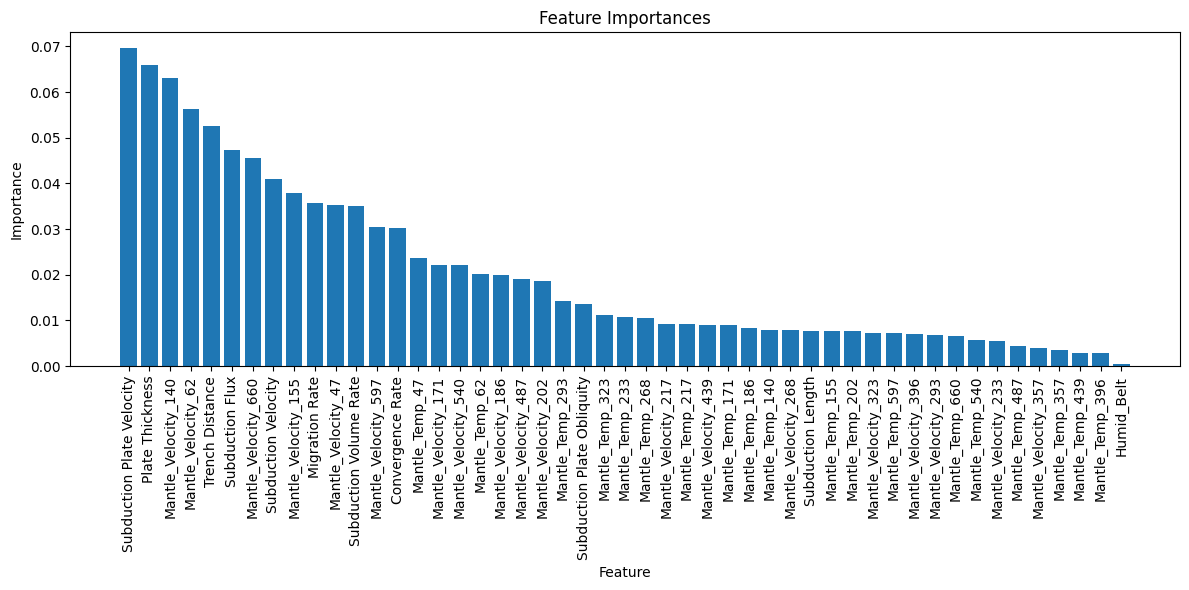

In [27]:
RFTopoModel_continents.plot_feature_importance()

<Axes: >

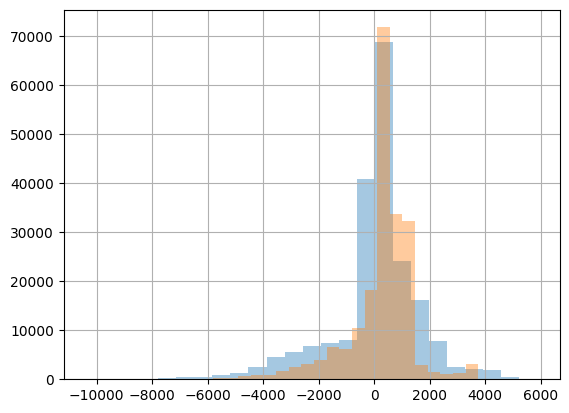

In [30]:
RFTopoModel_continents.df['Elevation'].hist(bins=25,alpha=0.4)
RFTopoModel_continents.df['Predicted Elevation'].hist(bins=25,alpha=0.4)

<GeoAxes: >

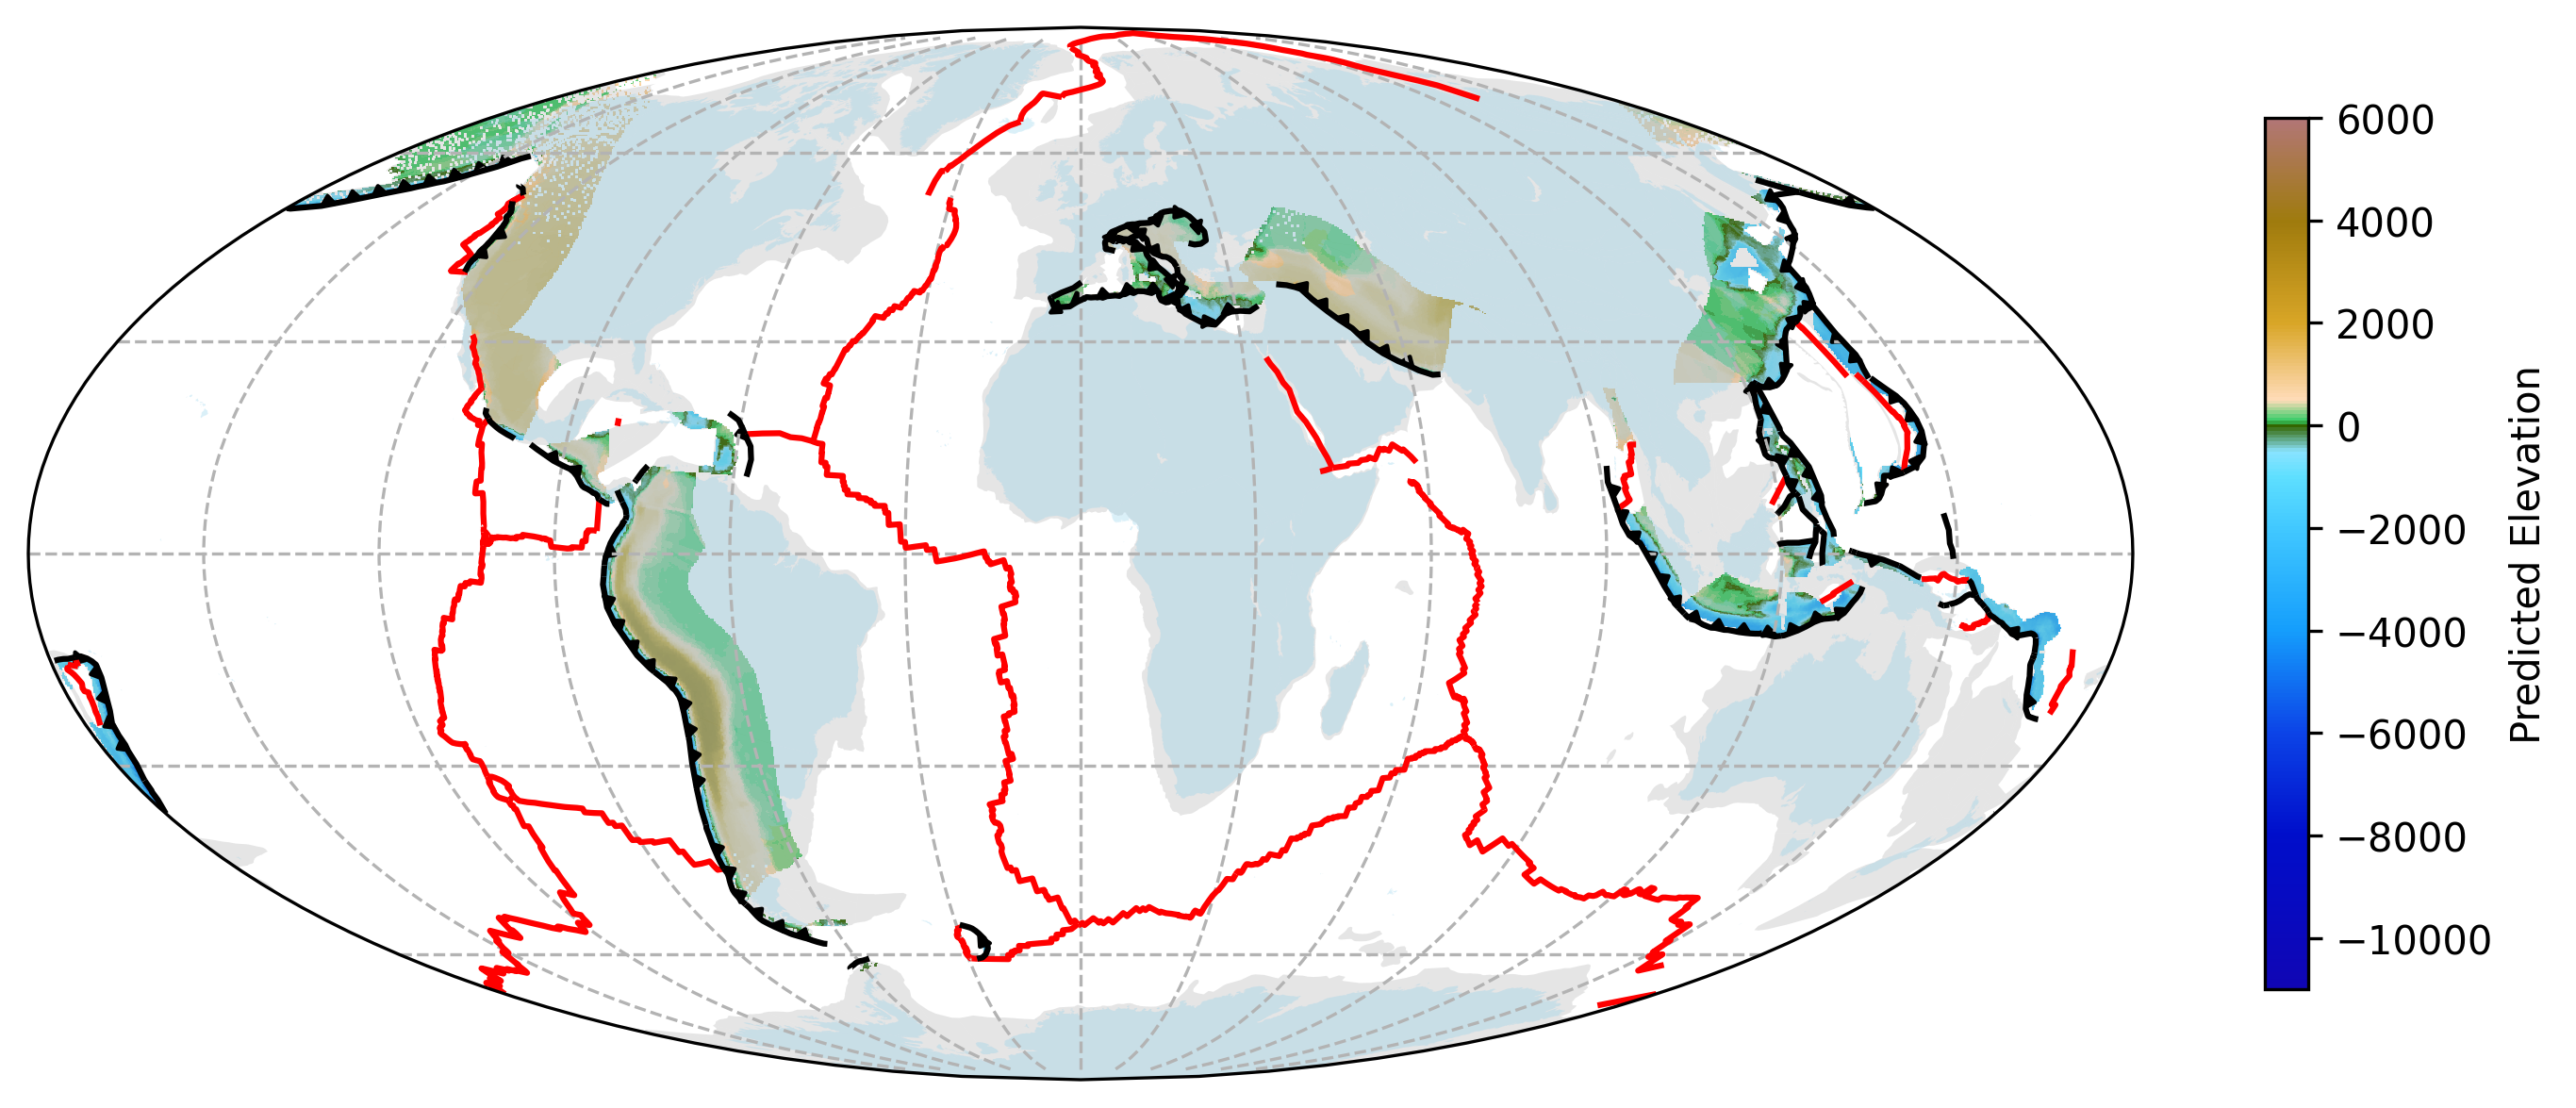

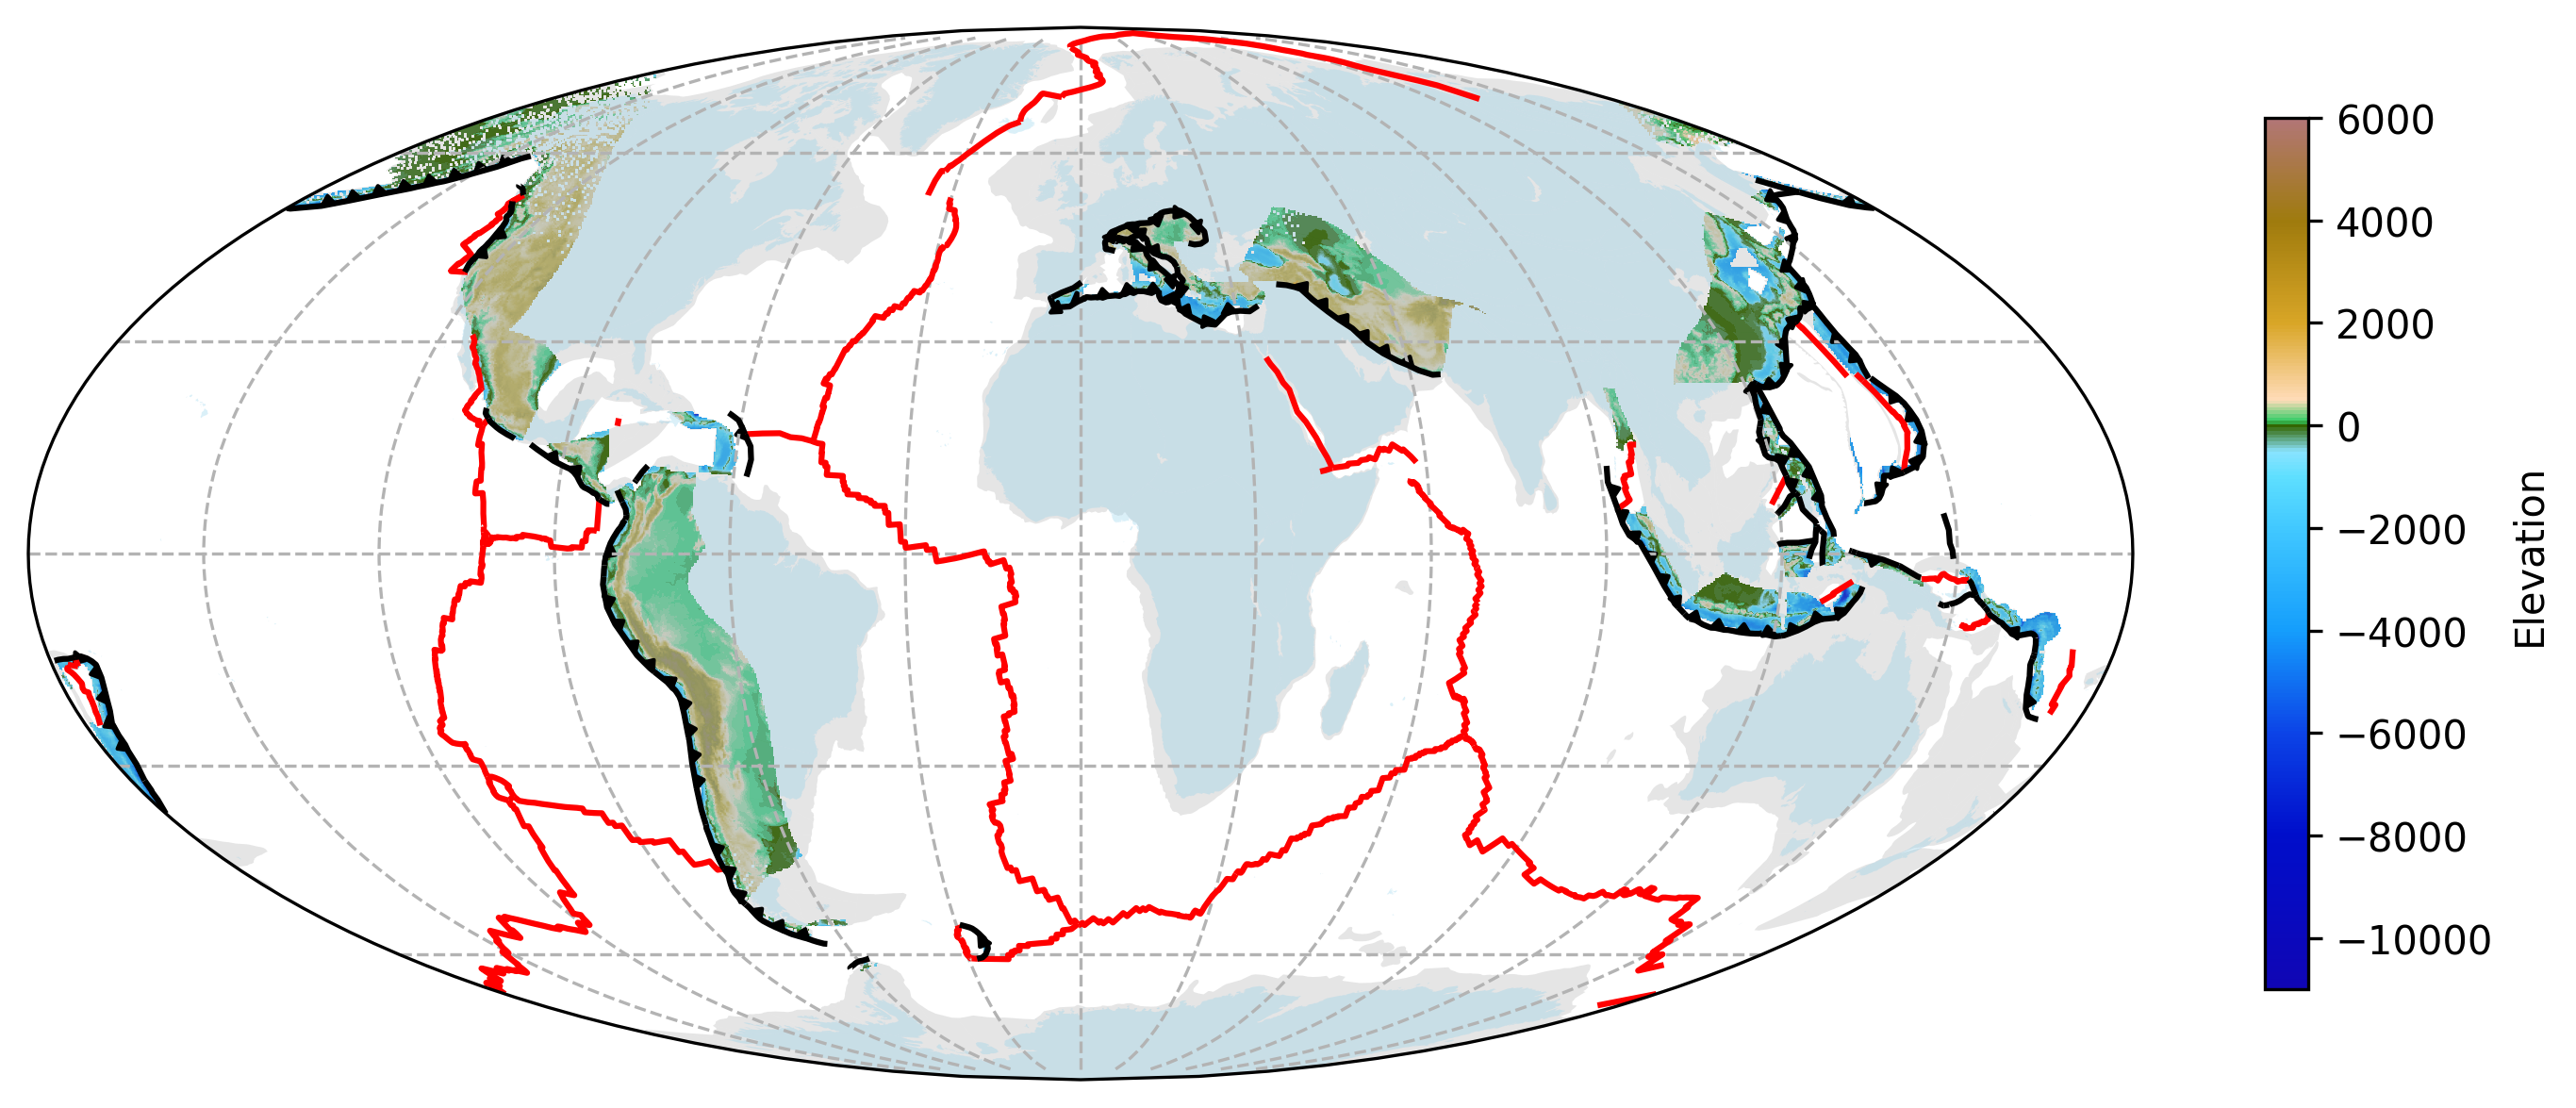

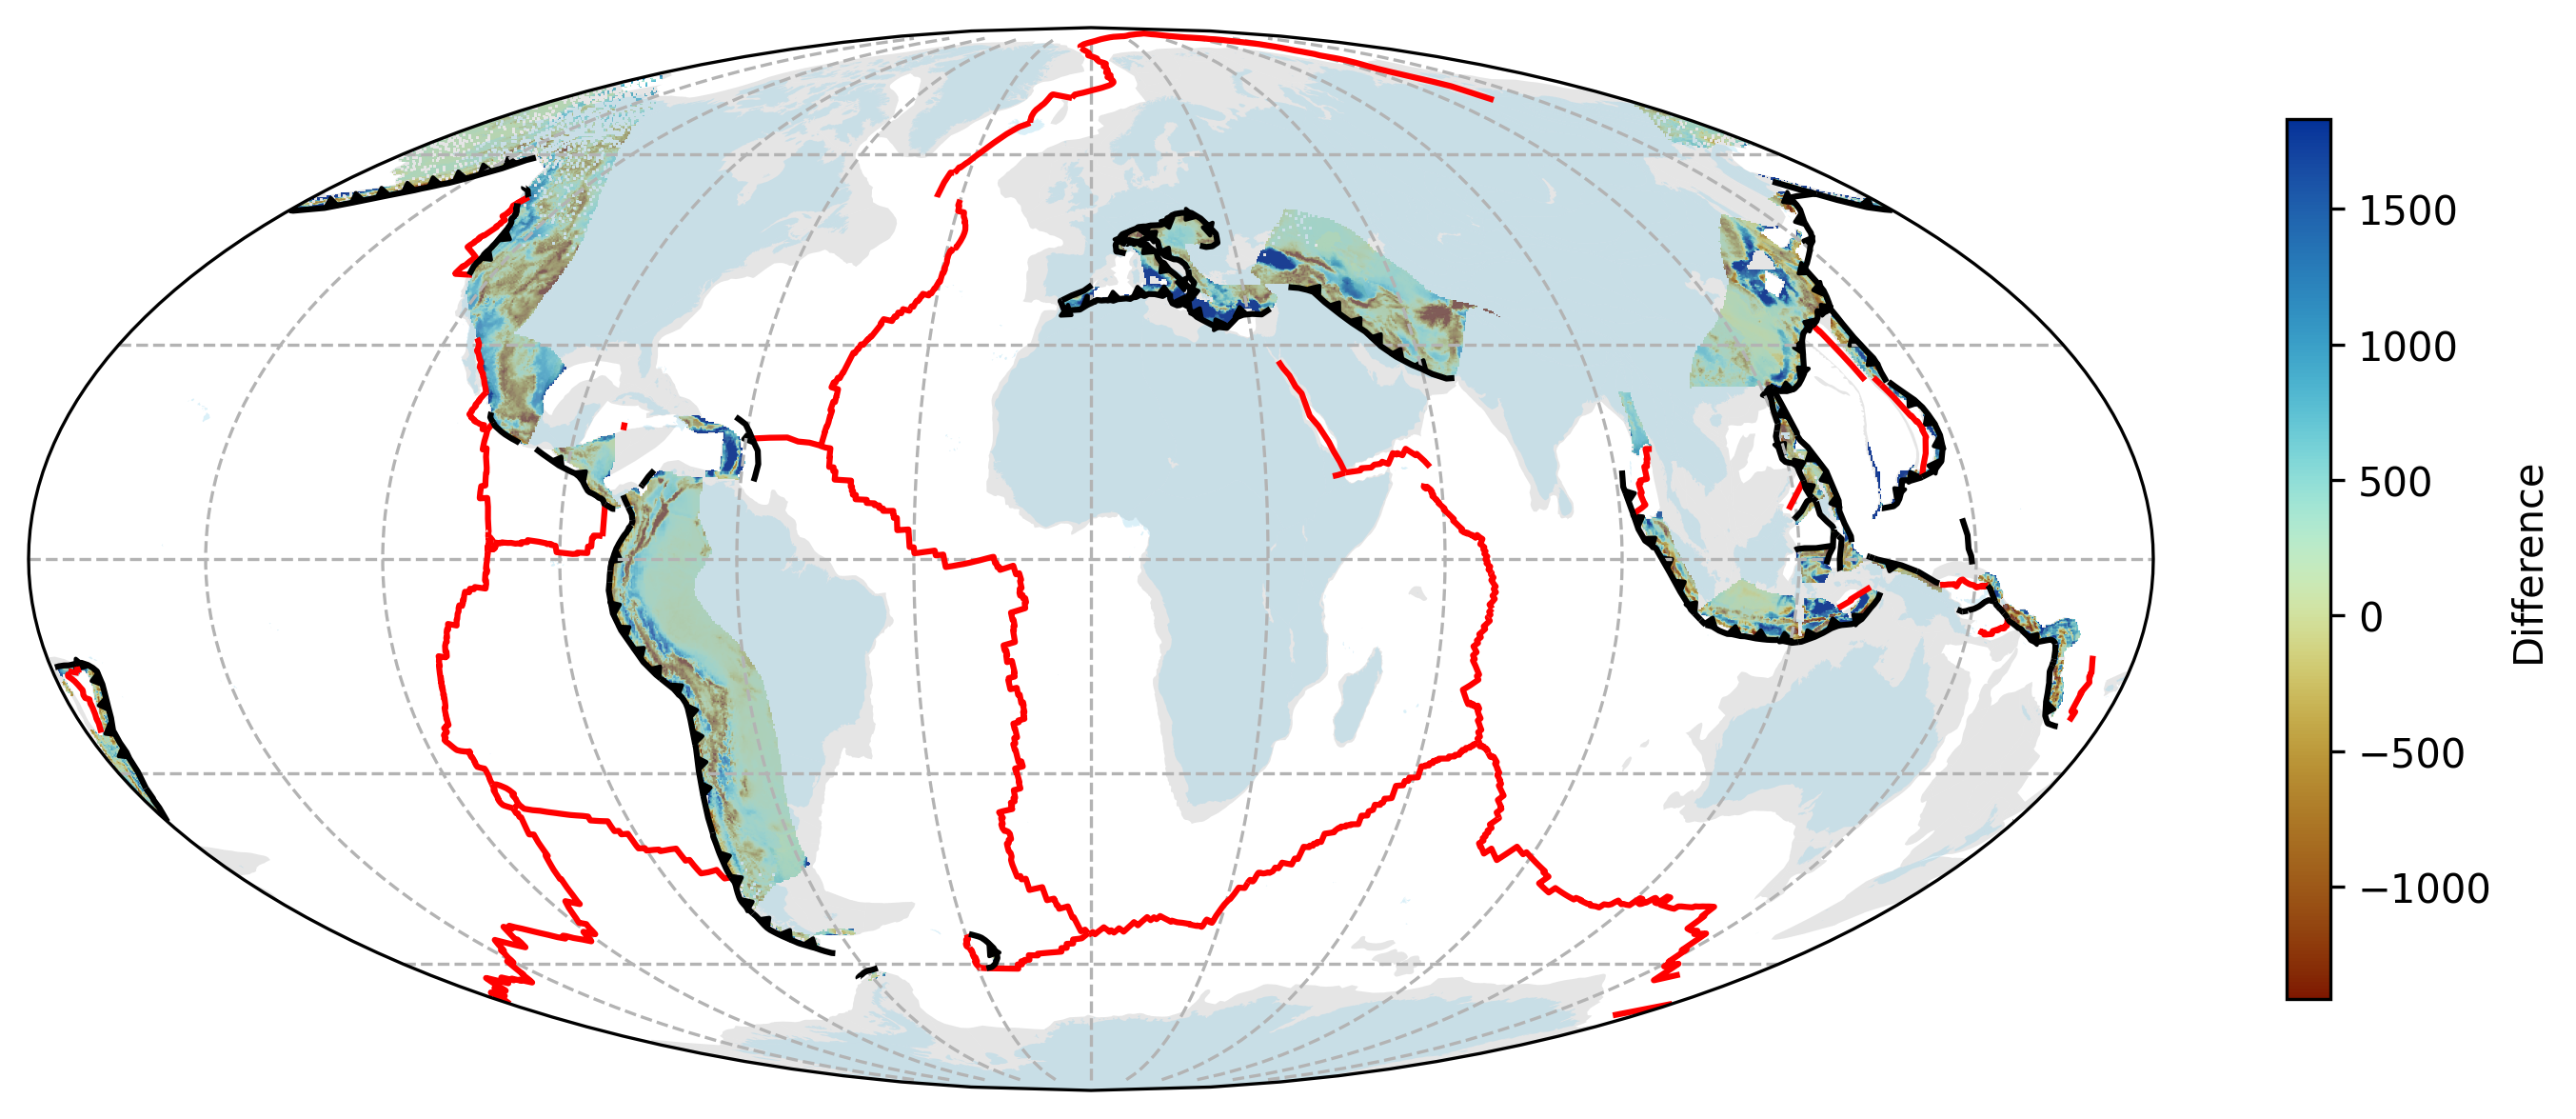

In [55]:
ETOPO_CMAP=get_cmap("ETOPO1-Reed.cpt")
RFTopoModel_continents.df['Predicted Elevation'].max()


column='Predicted Elevation'

data = RFTopoModel_continents.df[column]
# Calculate mean and standard deviation
mean = data.mean()
std = data.std()

# Calculate vmin and vmax
vmin = -11000
vmax = 6000
kwargs={'vmin':vmin,'vmax':vmax,'cmap':ETOPO_CMAP,'label':column}



plotgdf(RFTopoModel_continents.df,gplot=gplot,time=reconstruction_time,column=column,cbar=True,mollweide=True,quick=True,**kwargs)



column='Elevation'

data = RFTopoModel_continents.df[column]
# Calculate mean and standard deviation
mean = data.mean()
std = data.std()

# Calculate vmin and vmax
vmin = -11000
vmax = 6000
kwargs={'vmin':vmin,'vmax':vmax,'cmap':ETOPO_CMAP,'label':column}



plotgdf(RFTopoModel_continents.df,gplot=gplot,time=reconstruction_time,column=column,cbar=True,mollweide=True,quick=True,**kwargs)

RFTopoModel_continents.df['Difference']=RFTopoModel_continents.df['Predicted Elevation'] - RFTopoModel_continents.df['Elevation']

column='Difference'

data = RFTopoModel_continents.df[column]
# Calculate mean and standard deviation
mean = data.mean()
std = data.std()

# Calculate vmin and vmax
vmin = mean-2*std
vmax = mean+2*std
kwargs={'vmin':vmin,'vmax':vmax,'cmap':cmc.roma,'label':column}



plotgdf(RFTopoModel_continents.df,gplot=gplot,time=reconstruction_time,column=column,cbar=True,mollweide=True,quick=True,**kwargs)



#### Save Trained Random Forest Model

This section ensures that the directory for saving the Random Forest model exists and then saves the trained model to that directory.


In [32]:
# Ensure that the directory for saving the Random Forest model exists
create_directory_if_not_exists(f"{OUTPUT_FOLDER}/Models/Best_Models/RF_Model")

# Save the trained Random Forest model to the specified directory
RFTopoModel_continents.save_model(f"{OUTPUT_FOLDER}/Models/Best_Models/RF_Model")


Created directory: /Volumes/Satyam/BHPDryRun/Models/Best_Models/RF_Model
Saved DataFrame, model, and columns to /Volumes/Satyam/BHPDryRun/Models/Best_Models/RF_Model


## Deep Learning Model

#### Build and Train Deep Learning Model

This section configures, trains, and evaluates a Deep Learning model for predicting elevation based on the selected training data and parameters. 

#### Note
Deep learning models have a tendency to overfit, especially when trained on limited data. They work best when the plate kinematics data in the training set are averaged over a very large window size (greater than 40 Ma).


In [33]:


# DLTopoModel_continents=DLModel(training_df=TrainingData,
#                                training_variables=columns_to_train,
#                                target_variable='Elevation',
#                                nodes=16, 
#                                n_epoch=10, 
#                                dropout=0.4, 
#                                bn=True, 
#                                lr="OnPlateau", 
#                                scaler="StandardScaler")

# Initialize and configure the Deep Learning model for predicting elevation
DLTopoModel_continents = DLModel_torch(
    training_df=point_within_continentsc,  # DataFrame with points within continents
    training_variables=columns_to_train,  # List of features to be used for training
    target_variable='Elevation',  # Target variable for prediction
    nodes=16,  # Number of nodes in the hidden layers
    n_epoch=20,  # Number of training epochs
    dropout=0.1,  # Dropout rate to prevent overfitting
    bn=True,  # Use batch normalization
    lr="OnPlateau",  # Learning rate schedule that adjusts based on validation performance
    scaler="RobustScaler"  # Scaler used for feature scaling
)

# Train the Deep Learning model
DLTopoModel_continents.fit()

# Print the mean absolute error between predicted and actual elevations
print(f"Error={abs(DLTopoModel_continents.df['Predicted Elevation'] - DLTopoModel_continents.df['Elevation']).mean()} m")

# Note: Deep learning models have a tendency to overfit and generally perform better if the plate kinematics data
# are averaged over a large window size (>40 Ma).



Creating RFTimeTopo model based on parameters:
Humid_Belt
Convergence Rate
Migration Rate
Subduction Velocity
Subduction Length
Subduction Plate Velocity
Subduction Plate Obliquity
Subduction Volume Rate
Plate Thickness
Subduction Flux
Trench Distance
Mantle_Temp_47
Mantle_Temp_62
Mantle_Temp_140
Mantle_Temp_155
Mantle_Temp_171
Mantle_Temp_186
Mantle_Temp_202
Mantle_Temp_217
Mantle_Temp_233
Mantle_Temp_268
Mantle_Temp_293
Mantle_Temp_323
Mantle_Temp_357
Mantle_Temp_396
Mantle_Temp_439
Mantle_Temp_487
Mantle_Temp_540
Mantle_Temp_597
Mantle_Temp_660
Mantle_Velocity_47
Mantle_Velocity_62
Mantle_Velocity_140
Mantle_Velocity_155
Mantle_Velocity_171
Mantle_Velocity_186
Mantle_Velocity_202
Mantle_Velocity_217
Mantle_Velocity_233
Mantle_Velocity_268
Mantle_Velocity_293
Mantle_Velocity_323
Mantle_Velocity_357
Mantle_Velocity_396
Mantle_Velocity_439
Mantle_Velocity_487
Mantle_Velocity_540
Mantle_Velocity_597
Mantle_Velocity_660
Epoch 1, Train Loss: 4.4589, Val Loss: 2.8643
Epoch 2, Train Loss: 3

<Axes: >

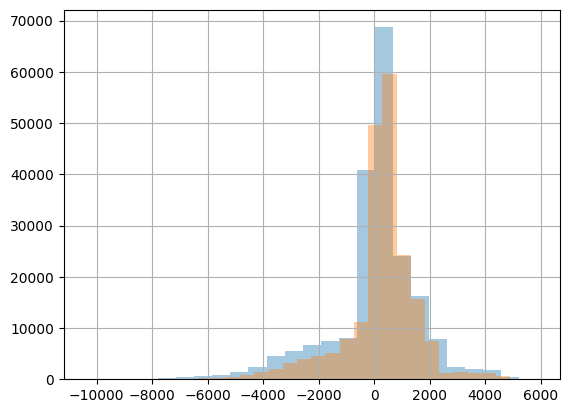

In [34]:
DLTopoModel_continents.df['Elevation'].hist(bins=25,alpha=0.4)
DLTopoModel_continents.df['Predicted Elevation'].hist(bins=25,alpha=0.4)

In [35]:
DLTopoModel_continents.df['Predicted Elevation'].max()

4901.6206

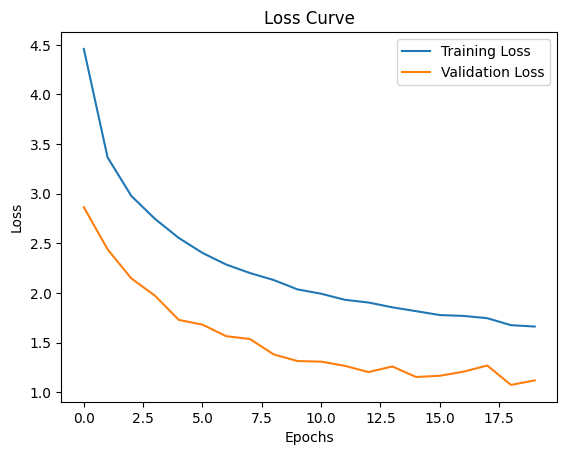

In [36]:
DLTopoModel_continents.plot_loss_curve()

In [37]:
create_directory_if_not_exists(f"{OUTPUT_FOLDER}/Models/Best_Models/DL_Model")
DLTopoModel_continents.save_model(f"{OUTPUT_FOLDER}/Models/Best_Models/DL_Model")

Created directory: /Volumes/Satyam/BHPDryRun/Models/Best_Models/DL_Model
Saved model components to /Volumes/Satyam/BHPDryRun/Models/Best_Models/DL_Model


Creating RFTimeTopo model based on parameters:
Humid_Belt
Convergence Rate
Migration Rate
Subduction Velocity
Subduction Length
Subduction Plate Velocity
Subduction Plate Obliquity
Subduction Volume Rate
Plate Thickness
Subduction Flux
Trench Distance
Mantle_Temp_47
Mantle_Temp_62
Mantle_Temp_140
Mantle_Temp_155
Mantle_Temp_171
Mantle_Temp_186
Mantle_Temp_202
Mantle_Temp_217
Mantle_Temp_233
Mantle_Temp_268
Mantle_Temp_293
Mantle_Temp_323
Mantle_Temp_357
Mantle_Temp_396
Mantle_Temp_439
Mantle_Temp_487
Mantle_Temp_540
Mantle_Temp_597
Mantle_Temp_660
Mantle_Velocity_47
Mantle_Velocity_62
Mantle_Velocity_140
Mantle_Velocity_155
Mantle_Velocity_171
Mantle_Velocity_186
Mantle_Velocity_202
Mantle_Velocity_217
Mantle_Velocity_233
Mantle_Velocity_268
Mantle_Velocity_293
Mantle_Velocity_323
Mantle_Velocity_357
Mantle_Velocity_396
Mantle_Velocity_439
Mantle_Velocity_487
Mantle_Velocity_540
Mantle_Velocity_597
Mantle_Velocity_660
Epoch 1, Train Loss: 2.0962, Val Loss: 1.5781
Epoch 2, Train Loss: 1

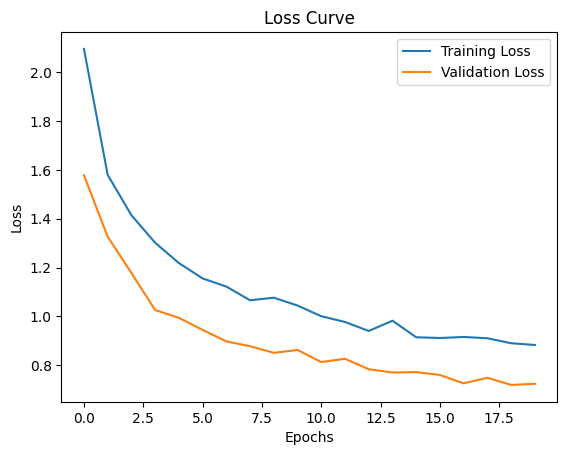

In [38]:
DLTopoModel_mountains=DLModel_torch(training_df=point_within_mountains,
                              training_variables=columns_to_train,
                              target_variable='Elevation',
                               nodes=8, 
                               n_epoch=20, 
                               dropout=0.01, 
                               bn=True, 
                               lr="OnPlateau", 
                               scaler="RobustScaler")
DLTopoModel_mountains.fit()
DLTopoModel_mountains.plot_loss_curve()

<Axes: >

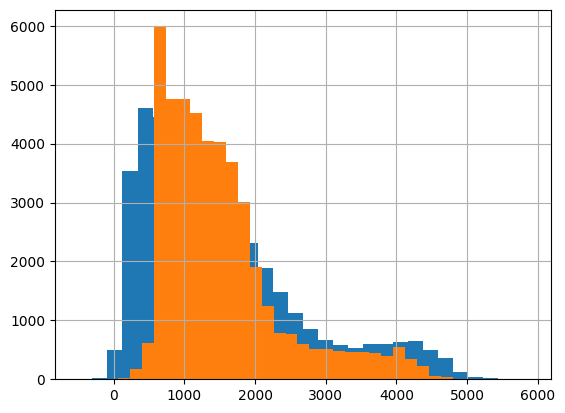

In [39]:
DLTopoModel_mountains.df['Elevation'].hist(bins=30)
DLTopoModel_mountains.df['Predicted Elevation'].hist(bins=30)

In [40]:
create_directory_if_not_exists(f"{OUTPUT_FOLDER}/Models/Best_Models/DL_Model_Mountains")
DLTopoModel_mountains.save_model(f"{OUTPUT_FOLDER}/Models/Best_Models/DL_Model_Mountains")

Created directory: /Volumes/Satyam/BHPDryRun/Models/Best_Models/DL_Model_Mountains
Saved model components to /Volumes/Satyam/BHPDryRun/Models/Best_Models/DL_Model_Mountains


# Predict Elevation

## Generate and Save Ensemble Predictions

This section creates a directory for saving predictions, defines a function to compute ensemble predictions using different models, and saves the predictions to a file.


In [43]:
# Ensure that the directory for saving predictions exists
create_directory_if_not_exists(f'{DEFAULT_OUTPUT_CSV}/Prediction')

def get_ensemble(reconstruction_time, columns_to_train=columns_to_train):
    try:
        # Print current processing time
        print(f"Working on Time={reconstruction_time} Ma")

        # Load the processed data for the given reconstruction time
        Data = pd.read_parquet(f"{DEFAULT_OUTPUT_CSV}/Processed_{WINDOW_SIZE}_Ma/Processed_Data_{reconstruction_time}.parquet")
        Data = Data[Data['Trench Distance'] < 1400000]
        Data = Data[Data['Trench Distance'] > 100000].copy()
       
        # Predict elevation using different models
        Data["ElevationRF"] = RFTopoModel_continents.predict(Data)  # Random Forest model predictions
        Data.to_parquet(f'{DEFAULT_OUTPUT_CSV}/Prediction/Predicted_{MODEL_NAME}_{reconstruction_time}Ma.parquet')

    except Exception as e:
        # Print error message if data is missing or another exception occurs
        print(f"Missing Data. Skipping Time Steps {reconstruction_time}")
        print(e)
        pass
    
    # Print confirmation that predictions have been saved
    print("Saved Prediction!")

    return Data


### Present Day Topography

In [44]:
Data=get_ensemble(0,columns_to_train=columns_to_train)
Data=ETopo.get_parameters(Data)

Working on Time=0 Ma
Saved Prediction!


In [45]:
print(50*"–")
print("Error of Model")
print(50*"–")
print("Random Forest Model:")
print(20*" –")

print(f'{np.mean(abs(RFTopoModel_continents.df["Difference"]))}')



––––––––––––––––––––––––––––––––––––––––––––––––––
Error of Model
––––––––––––––––––––––––––––––––––––––––––––––––––
Random Forest Model:
 – – – – – – – – – – – – – – – – – – – –
554.5657277057253


## Generate Predictions for All Time Steps

This section iterates over all available reconstruction times and generates ensemble predictions for each time step using the `get_ensemble` function.


In [56]:
# Iterate over all available time steps and generate ensemble predictions
for reconstruction_time in all_times:
    # Call the get_ensemble function to compute and save predictions for the current time step
    Dataf = get_ensemble(reconstruction_time)

Working on Time=0 Ma
Saved Prediction!
Working on Time=1 Ma
Saved Prediction!
Working on Time=2 Ma
Saved Prediction!
Working on Time=3 Ma
Saved Prediction!
Working on Time=4 Ma
Saved Prediction!
Working on Time=5 Ma
Saved Prediction!
Working on Time=6 Ma
Saved Prediction!
Working on Time=7 Ma
Saved Prediction!
Working on Time=8 Ma
Saved Prediction!
Working on Time=9 Ma
Saved Prediction!
